In [89]:
import pandas as pd
df = pd.read_csv('명단.txt')
df.sample(n=1)

,이름,소속
5,전태경,Util개발팀


In [1]:
!pip install torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
!pip install facenet_pytorch
!pip install opencv-python
!pip install numpy
!pip install pillow

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import cv2
from PIL import Image 
from IPython.display import Video

video_path = 'data/video_face_tracking.mp4'

In [3]:
Video(video_path, width=512)

In [5]:
cap = cv2.VideoCapture(video_path)

frames = []
while True:
    ret, img = cap.read()
    if not ret:
        break
        
    frames.append(img[:,:,[2,1,0]].copy())
    
len(frames)

105

In [6]:
img = frames[10]
img.shape

(1080, 1920, 3)

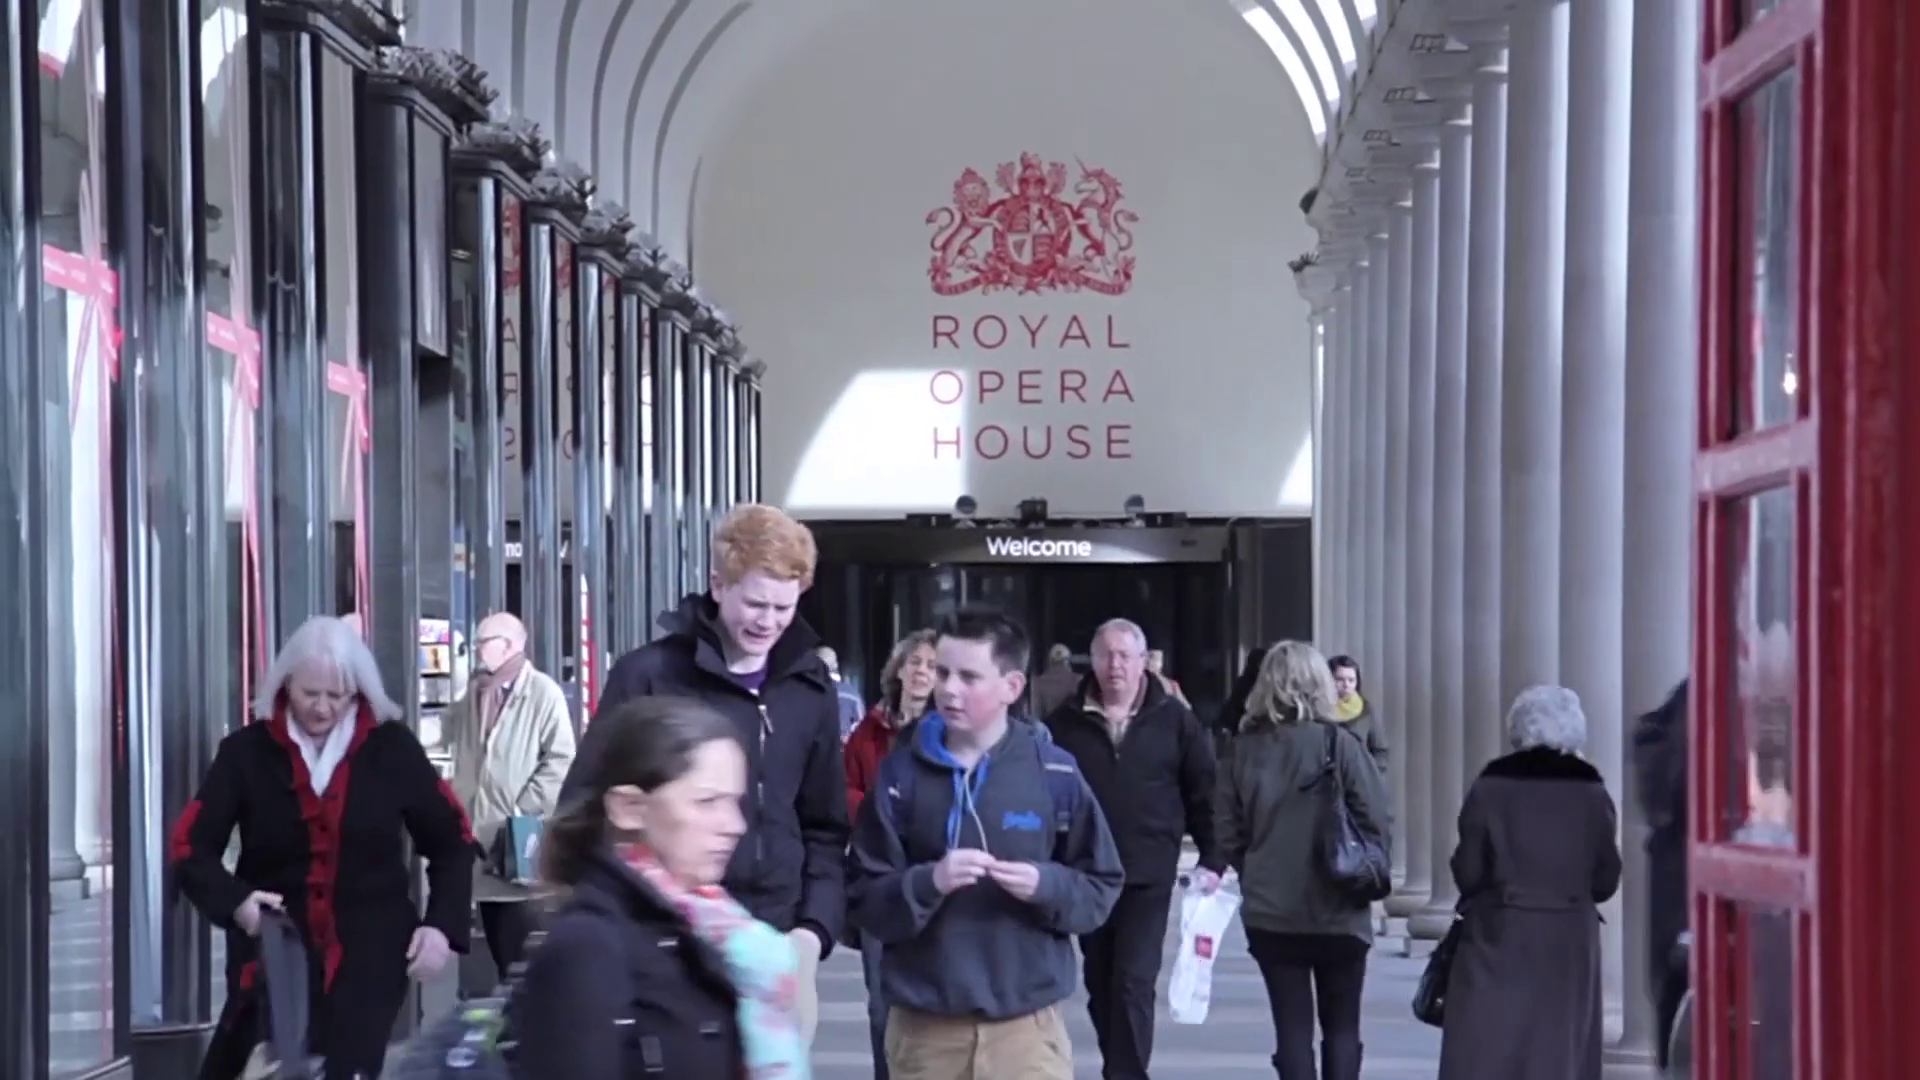

In [7]:
Image.fromarray(img)

In [8]:
frames = frames[60:100:2]
len(frames)

20

In [9]:
fd = MTCNN()
r = fd.detect(frames, landmarks=True)

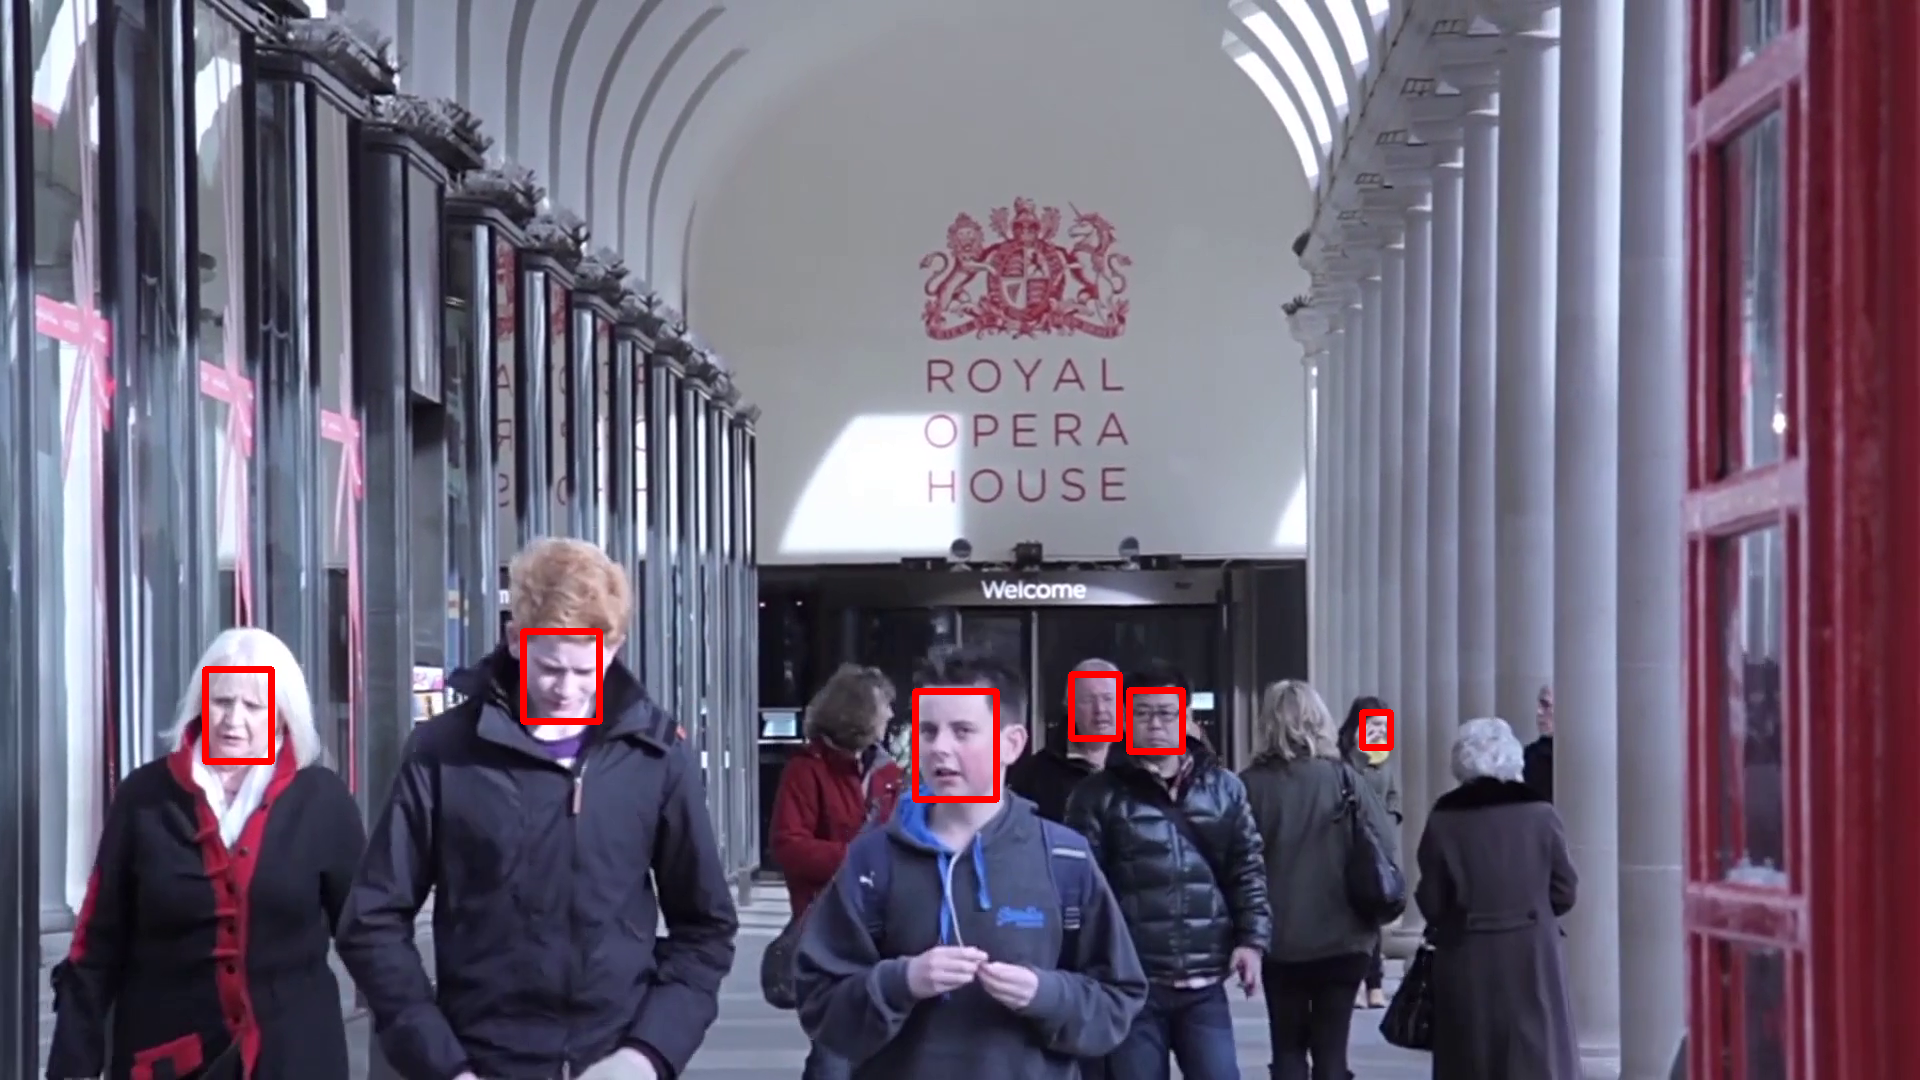

In [10]:
face_box, probs, pt5s = [e[1] for e in  r]

for (x1, y1, x2, y2) in face_box:
    cv2.rectangle(frames[1], (x1, y1), (x2, y2), (255,0,0), 5)
    
Image.fromarray(frames[1])



In [59]:

boxed = [draw_box(frame, face) for frame, face in zip(frames, faces)]

In [ ]:
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
h, w = frames[0].shape[:2]
out = cv2.VideoWriter('./output.avi', fourcc, 20.0, (w, h))
for frame in boxed:
    out.write(frame)
out.release()